# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
# magic to reload modules automatically
%load_ext autoreload
%autoreload 2

# standard imports
import numpy as np
from scipy import optimize
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from scipy.stats import beta

# Question 1

In [2]:
# a. defining variabeles
#monetary loss by agent (it is an array with 1000 values between 0.01 and 0.9)
x_vec=np.linspace(0.01, 0.9, 1000)

#assets held by the agent
y=1. 

#probability of loss being insured
p=0.2 

#utility parameter
theta=-2. 

#b. defining equation
def u(z):
    """ utility function
    args:
        z (float): input variable  
    retur
        u (ndarray): output array
    """
    return (z**(1.+theta))/(1.+theta)

def v(q, x):
    """ expected value of ensured agent
    args:
        q (float): input variable
        x (float): input varaible
    return:
        v (ndarray): output array
    """
    return p*u(y-x+q-p*q)+(1.-p)*u(y-p*q)

#c. finding the optimal q for the agent

#defining the optimizing function
def opt_q(q_res): 
    """ optimal insureance coverage
    args:
        q_res (ndarray): input array
    return:
        opt_q (ndarray): output array
    """
    
    #looping over x values in x_vec
    for i,x in enumerate(x_vec):
        
        #i defining objective function
        obj = lambda q: -v(q, x) 
        
        #ii calling the optimizer
        res = optimize.minimize_scalar(obj, bounds=(0,x), method = 'bounded') 
        
        #iii applying the value of the optimizer onto the variable q_res
        q_res[i] = res.x 

#d. definging and applying the values found in c to the opt_q function

#defining an empty variable
q_res=np.empty(x_vec.size) 

#applying the values from q_res to the function opt_q
opt_q(q_res)

Text(0, 0.5, 'q-star')

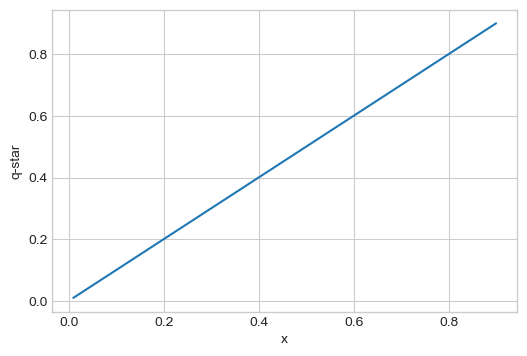

In [3]:
#Print figure
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(x_vec, q_res)
ax.set_xlabel('x')
ax.set_ylabel('q-star')

# Question 2

In [4]:
#a. defining variables

#value of loss
x=0.6 

#insurrance coverage (ndarray)
q_vec=np.linspace(0.01, x, 1000)

#utility incase of no insurance
v_0=p*u(y-x)+(1-p)*u(y)

#b. defining equations
def v_q2(q, pi):
    """ expected value of ensured agent
    args:
        q (float): input variable
        pi (float): input varaible
    return:
        v_q2 (ndarray): output array
    """
    return p*u(y-x+q-pi)+(1-p)*u(y-pi)

def diff(q, pi):
    """ difference in utilty between ensured and unensured agetns
    args:
        q (float): input variable
        pi (float): input varaible
    return:
        diff (ndarray): output array
    """
    return np.absolute(v_q2(q, pi) - v_0)

#c. optimize
def opt_pi(pi_tilde):
    """ acceptable premium policies
    args:
        pi_tilde (empty ndarray): input array
    return:
        opt_pi (ndarray): output array
    """
    
    #looping every q in q_vec into opt_pi
    for i,q in enumerate(q_vec):
        
        #deining the objective function
        obj = lambda pi: diff(q, pi)
        
        #calling the optimizer
        res = optimize.minimize_scalar(obj, bounds=(0,q), method = 'bounded')
        
        #appending the value of res into pi_tilde
        pi_tilde[i] = res.x


#definging an empty array for the values of res
pi_tilde=np.empty(q_vec.size)

#applying value of pi_tilde into the acceptable premium policy
opt_pi(pi_tilde)
#calculating the non optimized pi
pi = p*q_vec


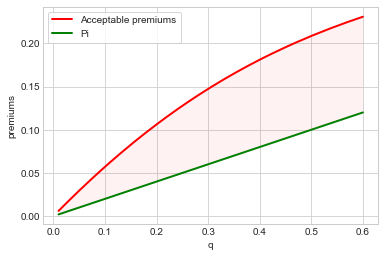

In [5]:
#Plot figur
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(q_vec,pi_tilde,ls='-',lw=2,color='red',label='Acceptable premiums')
ax.plot(q_vec,pi,ls='-',lw=2,color='green',label='Pi')
ax.fill_between(q_vec, pi, pi_tilde, facecolor="red", alpha=0.05)

ax.set_xlabel('q')
ax.set_ylabel('premiums')
ax.legend(loc='upper left',frameon=True);

# Question 3

In [6]:
# a. define variabele
#setting seet
np.random.seed(1997)

#drawing x's from a beta distrubution
x_beta = np.random.beta(a=2,b=7,size=50000)

# b. defining functions
def montecarlo(gamma, pi_q3):
    """ the agents utility level with x drawn from beta distrubtion 
    args:
        gamma (float): input value
        pi_q3 (ndarray): input array
    return:
        np.mean (float): output value
    """
    pi_q3=p*gamma*x_beta
    return np.mean(u(y-(1-gamma)*x_beta-pi_q3))

#c. applying the montecarlo function to the two insurance casses
insurance_1 = montecarlo(0.9, 0.2)
insurance_2 = montecarlo(0.45, 0.11)

#d. printing result
print("The utilility of insurance 1 is "+str(insurance_1)+" and the utility of insurance 2 is "+str(insurance_2))

if insurance_1>insurance_2:
    print("Incurance 1 is therefore preferable to the agent") 
else: 
    print("Incurance 2 is therefore preferable to the agent")

The utilility of insurance 1 is -1.067845494958894 and the utility of insurance 2 is -1.1777496706934958
Incurance 1 is therefore preferable to the agent


# Questen 4

In [7]:
#a. definging variables

#ensurance coverage
gamma=0.95

#globally defining pi_q3 (this can be done now because gamme is defined
pi_q3=p*gamma*x_beta

#b. defining functions
def montecarlo_insurance(pi_q3):
    """ the agnets utility given insureance
    args:
        pi_q3 (ndarray): input array
    return:
        monetecarlo_insurance (float): output value
    """
    
    #the mean value of ensurence for the agent
    return np.mean(u(y-(1-gamma)*x-pi_q3))
 
def montecarlo_noinsurance(pi_q3):
    """ the agents utility given no insureance
    args:
        pi_q3 (ndarray): input array
    return:
        monetecarlo_noinsurance (float): output value
    """
    # the utility of the agent given no profit the firm and the agent has the whole burden of the loss
    return np.mean(u(y-x))

#c. optimizing 
obj = lambda pi_q3: np.absolute(montecarlo_insurance(pi_q3)-montecarlo_noinsurance(pi_q3))
pi_star_guess=0.1
res_q4 = optimize.root(obj, pi_star_guess, method = 'broyden1')
pi_star = res_q4.x

#d. oprinting output
print(f'Profit maximizing premium is : {pi_star:.5f}')

Profit maximizing premium is : 0.57000
